## Lógica Básica en Julia

In [2]:
#using Pkg; Pkg.add("Plots")
using Plots

**La una buena parte del código que se escribe no es para procesar números sino para tomar decisiones.**

Veamos un ejemplo. Asignando distintos valores a `a`y `b` obtenemos distintos resultados en la celda. Pruebe hasta que haya obtenido todos los resultados posibles.

In [3]:
a = 0.5
b = 2

if a > 1
    println("Hola")
elseif a == 1
    println("Chau")
elseif a < 1
    println("otra cosa")
else
    println("Que hago?")
end

println("ya termina el programa")

otra cosa
ya termina el programa


Qué es lo que sucede? Los operadores `>`, `<`y `==` son operadores lógicos. Es decir retornan *verdadero* (`true`) o *falso* (`false`) de acuerdo los valores que se les da.

In [4]:
a > b

false

In [5]:
2 > 1

true

In [6]:
typeof(2>1)

Bool

Veamos que información tenemos sobre uno de ellos:

In [7]:
?>

search: > >> >= >: >>> -> |> =>



```
>(x, y)
```

Greater-than comparison operator. Falls back to `y < x`.

# Implementation

Generally, new types should implement [`<`](@ref) instead of this function, and rely on the fallback definition `>(x, y) = y < x`.

# Examples

```jldoctest
julia> 'a' > 'b'
false

julia> 7 > 3 > 1
true

julia> "abc" > "abd"
false

julia> 5 > 3
true
```

---

```
>(x)
```

Create a function that compares its argument to `x` using [`>`](@ref), i.e. a function equivalent to `y -> y > x`. The returned function is of type `Base.Fix2{typeof(>)}`, which can be used to implement specialized methods.

!!! compat "Julia 1.2"
    This functionality requires at least Julia 1.2.



**Vemos que `>` es realmente una función!** Más familiarmente la podemos expresar así:

In [8]:
>(3,2)

true

A nivel del compilador realiza una operación así: 

In [9]:
@code_llvm(>(1,2))

;  @ operators.jl:378 within `>`
define i8 @"julia_>_1948"(i64 signext %0, i64 signext %1) #0 {
top:
; ┌ @ int.jl:83 within `<`
   %2 = icmp slt i64 %1, %0
; └
  %3 = zext i1 %2 to i8
  ret i8 %3
}


Los valores del álgebra booleana, `true` y `false` se pueden convertir a los enteros `1` y `0` respectivamente. 

In [12]:
true * 5

5

In [13]:
false * 5

0

Veamos como podemos usar esta propiedad para definir funciones particulares y visualizar la acción de los operadores lógicos. Por ejemplo, la siguiente función pega una parábola negativa con otra positiva en $x=0$.

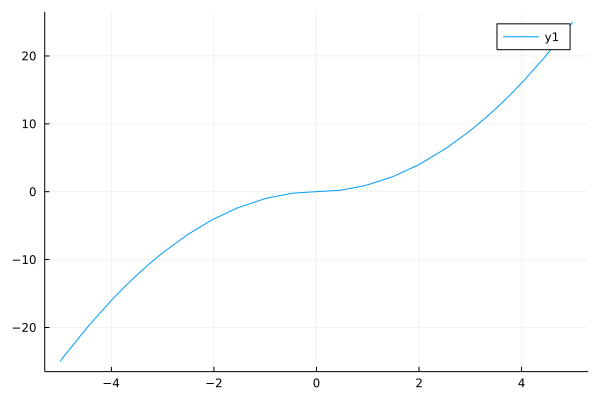

In [14]:
x0 = 0
f(x) = -(x < x0)*x^2 + (x >= x0)*x^2
plot(f)

### Ejercicio: 

Cómo construyo la función valor absoluto?

## Los operadores &&, || y !

Corresponden a los operadores, **y**, **o** y **negación**.

In [15]:
true && true # and

true

In [16]:
false || true # or

true

In [17]:
!true

false

Podemos generar las tablas lógicas facilmente!

In [18]:
A = (true, false)

And = [i && j for i in A, j in A]

2×2 Matrix{Bool}:
 1  0
 0  0

In [19]:
Or = [i || j for i in A, j in A]

2×2 Matrix{Bool}:
 1  1
 1  0

In [20]:
.!And .== Or

2×2 BitMatrix:
 0  1
 1  0

Para familiarizarnos con estos operadores podemos aplicarlos a la construcción de funciones simples:

In [21]:
function g_e(x)
    if x >= 0 && x <= 1 return 1.
    else return 0
    end
end

g_e (generic function with 1 method)

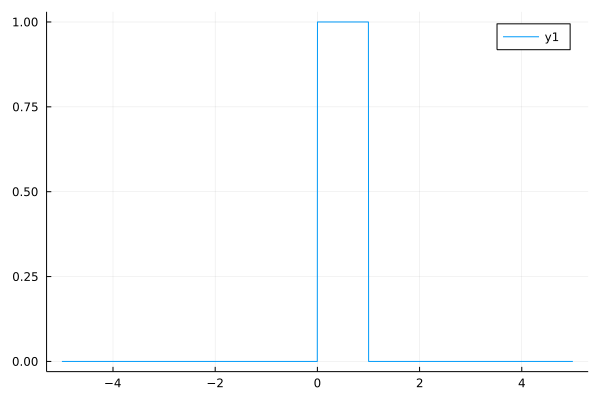

In [22]:
plot(g_e)

In [23]:
g(x) = 1.0*(x >= 0 && x <=1)

g (generic function with 1 method)

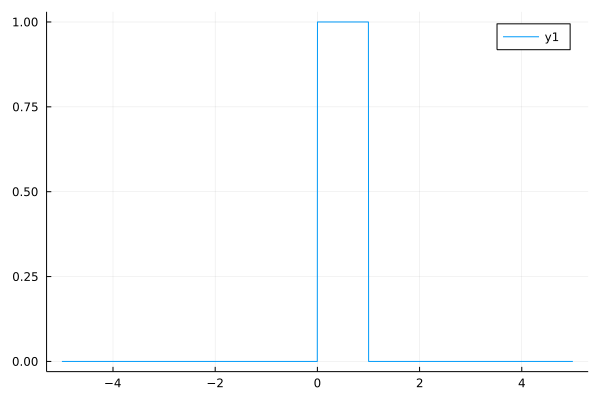

In [24]:
plot(g)

Cómo hacemos la función $h(\cdot)$ que vale 1 en todos lados excepto en el intervalo $[0,1]$ donde vale 1?

Notemos que $h(x) = 1 - g(x)$.

In [25]:
h(x) = 1.0*(x < 0 || x >= 1)

h (generic function with 1 method)

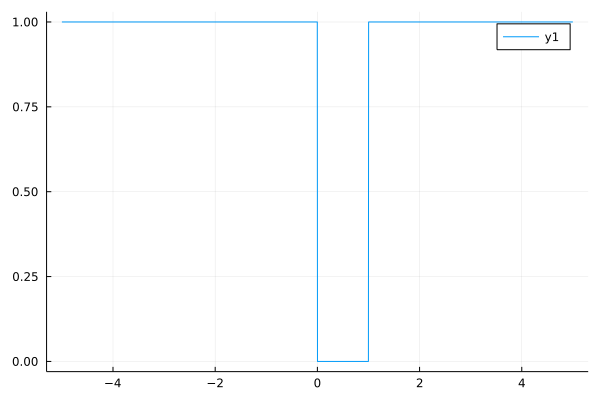

In [26]:
plot(h)

### Otros operadores que retornan tipos booleanos

In [27]:
issubset([4,5], [4,5,6])

true

In [28]:
[4,5] ⊆ [4,5,6] #\subseteq <tab>

true

In [29]:
4 ∈ [3,4,5] # \in <tab>

true

In [30]:
"hola" ∈ (1., 3, "hola", [1,2,3])

true

In [31]:
in([4,6,5]).([4, 6]) # verdadero / falso dependiendo de si cada elemento del segundo conjunto está en el primero

2-element BitVector:
 1
 1

In [32]:
all(i->(4<=i<=6), [4,5,6])

true

In [33]:
l = [true, true, false]
all(l)

false

In [34]:
all(in([4,6,5]).([4, 6]))

true

In [35]:
contains("hola que tal", "que")

true

In [36]:
2 isa Int64

true

In [37]:
2. isa Float64

true

In [38]:
?in

search: in inv In Int Inf Int8 invoke Int64 Int32 Int16 invmod Inf64 Inf32 Inf16



```
in(collection)
∈(collection)
```

Create a function that checks whether its argument is [`in`](@ref) `collection`, i.e. a function equivalent to `y -> y in collection`. See also [`insorted`](@ref) for use with sorted collections.

The returned function is of type `Base.Fix2{typeof(in)}`, which can be used to implement specialized methods.

---

```
in(item, collection) -> Bool
∈(item, collection) -> Bool
```

Determine whether an item is in the given collection, in the sense that it is [`==`](@ref) to one of the values generated by iterating over the collection. Returns a `Bool` value, except if `item` is [`missing`](@ref) or `collection` contains `missing` but not `item`, in which case `missing` is returned ([three-valued logic](https://en.wikipedia.org/wiki/Three-valued_logic), matching the behavior of [`any`](@ref) and [`==`](@ref)).

Some collections follow a slightly different definition. For example, [`Set`](@ref)s check whether the item [`isequal`](@ref) to one of the elements. [`Dict`](@ref)s look for `key=>value` pairs, and the key is compared using [`isequal`](@ref). To test for the presence of a key in a dictionary, use [`haskey`](@ref) or `k in keys(dict)`. For these collections, the result is always a `Bool` and never `missing`.

To determine whether an item is not in a given collection, see [`:∉`](@ref). You may also negate the `in` by doing `!(a in b)` which is logically similar to "not in".

When broadcasting with `in.(items, collection)` or `items .∈ collection`, both `item` and `collection` are broadcasted over, which is often not what is intended. For example, if both arguments are vectors (and the dimensions match), the result is a vector indicating whether each value in collection `items` is `in` the value at the corresponding position in `collection`. To get a vector indicating whether each value in `items` is in `collection`, wrap `collection` in a tuple or a `Ref` like this: `in.(items, Ref(collection))` or `items .∈ Ref(collection)`.

# Examples

```jldoctest
julia> a = 1:3:20
1:3:19

julia> 4 in a
true

julia> 5 in a
false

julia> missing in [1, 2]
missing

julia> 1 in [2, missing]
missing

julia> 1 in [1, missing]
true

julia> missing in Set([1, 2])
false

julia> !(21 in a)
true

julia> !(19 in a)
false

julia> [1, 2] .∈ [2, 3]
2-element BitVector:
 0
 0

julia> [1, 2] .∈ ([2, 3],)
2-element BitVector:
 0
 1
```

See also: [`insorted`](@ref), [`contains`](@ref), [`occursin`](@ref), [`issubset`](@ref).

---

```
in(p, sc)
```

Returns true if `p` is in `sc`. In the case that `sc` is a SortedDict or SortedMultiDict, `p` is a key=>value pair. In the case that `sc` is a SortedSet, `p` should be a key. Time: O(*c* log *n* + *d*) for SortedDict and SortedSet, where *d* stands for the time to compare two values. In the case of SortedMultiDict, the time is O(*c* log *n* + *dl*), and *l* stands for the number of entries that have the key of the given pair. (So therefore this call is inefficient if the same key addresses a large number of values, and an alternative should be considered.)

---

```
in(p, sc)
```

Returns true if `p` is in `sc`. In the case that `sc` is a SortedDict or SortedMultiDict, `p` is a key=>value pair. In the case that `sc` is a SortedSet, `p` should be a key. Time: O(*c* log *n* + *d*) for SortedDict and SortedSet, where *d* stands for the time to compare two values. In the case of SortedMultiDict, the time is O(*c* log *n* + *dl*), and *l* stands for the number of entries that have the key of the given pair. (So therefore this call is inefficient if the same key addresses a large number of values, and an alternative should be considered.)

---

```
in(b1::Rect, b2::Rect)
```

Check if Rect `b1` is contained in `b2`. This does not use strict inequality, so Rects may share faces and this will still return true.

---

```
in(pt::VecTypes, b1::Rect{N, T})
```

Check if a point is contained in a Rect. This will return true if the point is on a face of the Rect.

---

```
in(point, triangle)
```

Determine if a point is inside of a triangle.
